In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ranksums
import sklearn.preprocessing as skp
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [73]:
random_seed = 3212 #my birthday

## Preprocessing Data

In [74]:
art = pd.read_csv('theArt.csv')
data = pd.read_csv('theData.csv', header = None)

In [75]:
art.head()

,Number,Artist,Title,Style,Year,"Source (1 = classical, 2 = modern, 3 = nonhuman)","computerOrAnimal (0 = human, 1 = computer, 2 = animal)","Intent (0 = no, 1 = yes)"
0,1,Durer,Self-Portrait,Northern Renaissance,1500,1,0,1
1,2,de Vinci,Mona Lisa,Renaissance,1503,1,0,1
2,3,Michelangelo,The Creation of Adam,Italian Renaissance,1512,1,0,1
3,4,Bruegel,Tower of Babel,Dutch and Flemish Renaissance,1563,1,0,1
4,5,Hals,Laughing Cavalier,Baroque,1624,1,0,1


In [76]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Number                                                  91 non-null     int64 
 1   Artist                                                  91 non-null     object
 2   Title                                                   91 non-null     object
 3   Style                                                   91 non-null     object
 4   Year                                                    91 non-null     int64 
 5   Source (1 = classical, 2 = modern, 3 = nonhuman)        91 non-null     int64 
 6   computerOrAnimal (0 = human, 1 = computer, 2 = animal)  91 non-null     int64 
 7   Intent (0 = no, 1 = yes)                                91 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 5.8+ KB


In [77]:
art.isnull().sum()

Number                                                    0
Artist                                                    0
Title                                                     0
Style                                                     0
Year                                                      0
Source (1 = classical, 2 = modern, 3 = nonhuman)          0
computerOrAnimal (0 = human, 1 = computer, 2 = animal)    0
Intent (0 = no, 1 = yes)                                  0
dtype: int64

In [78]:
headers = [str(i) for i in range(1,92)] + ['energy_'+str(i) for i in range(1,92)] + ['dark_'+str(i) for i in range(1,13)] + ['action_'+str(i) for i in range(1,12)] + ['self_'+str(i) for i in range(1,11)] + ['age', 'gender', 'politics', 'art_ed', 'sophistication', 'artist']
data.columns = headers

In [79]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,self_7,self_8,self_9,self_10,age,gender,politics,art_ed,sophistication,artist
0,7,6,2,6,3,3,5,4,6,6,...,5.0,2.0,3.0,4.0,19.0,2.0,3.0,0.0,2.0,2.0
1,6,6,5,6,5,5,4,6,2,5,...,4.0,3.0,2.0,4.0,20.0,1.0,6.0,1.0,3.0,1.0
2,7,6,6,6,5,6,7,6,5,5,...,4.0,1.0,2.0,2.0,18.0,2.0,2.0,1.0,1.0,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5.0,3.0,5.0,4.0,21.0,2.0,5.0,1.0,3.0,0.0
4,7,5,5,5,6,5,5,7,6,7,...,3.0,4.0,3.0,3.0,22.0,1.0,3.0,0.0,3.0,0.0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 221 entries, 1 to artist
dtypes: float64(39), int64(182)
memory usage: 518.1 KB


In [81]:
data.isnull().sum()

1                  0
2                  0
3                  0
4                  0
5                  0
                  ..
gender            20
politics          20
art_ed            20
sophistication    20
artist            20
Length: 221, dtype: int64

## Question 1

In [82]:
classical = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)'] == 1]
classical_ratings = data.iloc[:, 0:35]

In [83]:
modern = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)'] == 2]
modern_ratings = data.iloc[:, 35:70]

In [84]:
classical_mean = classical_ratings.mean().mean()
classical_median = classical_ratings.median().median()
print(classical_mean)
print(classical_median)

4.741523809523809
5.0


In [85]:
modern_mean = modern_ratings.mean().mean()
modern_median = modern_ratings.median().median()
print(modern_mean)
print(modern_median)

4.25657142857143
4.0


Classical art is more well liked than modern art.

## Question 2

In [210]:
nonhuman = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)'] == 3]
nonhuman_ratings = data.iloc[:, 70:91]
nonhuman_mean = nonhuman_ratings.mean().mean()
nonhuman_median = nonhuman_ratings.median().median()
print(nonhuman_mean)
print(nonhuman_median)

3.308095238095238
3.0


In [208]:
q2_modern = modern_ratings.values.flatten()
q2_nonhuman = nonhuman_ratings.values.flatten()

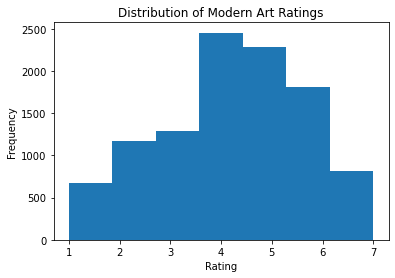

In [209]:
plt.hist(q2_modern, bins=7, range=(1,7))
plt.title('Distribution of Modern Art Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

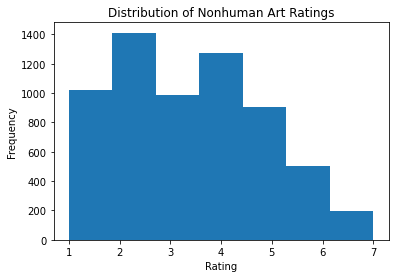

In [89]:
plt.hist(q2_nonhuman, bins=7, range=(1,7))
plt.title('Distribution of Nonhuman Art Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [90]:
# Mann–Whitney U test
statistic, p_value = ranksums(q2_modern, q2_nonhuman)
print(p_value)

1.6275105785977077e-256


Since the p value is 0, there is a statistically significant difference in the  preference ratings for modern art vs. non-human (animals and computers) generated art. 

## Question 3

In [91]:
q3data = data.loc[:, '1':'91'].assign(gender=data['gender'])
q3data.head()

,1,2,3,4,5,6,7,8,9,10,...,83,84,85,86,87,88,89,90,91,gender
0,7,6,2,6,3,3,5,4,6,6,...,2,2,1,2,1,1,5,5,2,2.0
1,6,6,5,6,5,5,4,6,2,5,...,5,3,2,3,6,1,4,2,5,1.0
2,7,6,6,6,5,6,7,6,5,5,...,4,7,6,3,4,4,5,4,4,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5,6,4,2,4,4,4,3,5,2.0
4,7,5,5,5,6,5,5,7,6,7,...,1,4,2,5,4,2,4,6,3,1.0


In [92]:
q3data['gender'].unique()

array([ 2.,  1.,  3., nan])

In [93]:
q3data = q3data[q3data['gender'] != 3]
q3data.head()

,1,2,3,4,5,6,7,8,9,10,...,83,84,85,86,87,88,89,90,91,gender
0,7,6,2,6,3,3,5,4,6,6,...,2,2,1,2,1,1,5,5,2,2.0
1,6,6,5,6,5,5,4,6,2,5,...,5,3,2,3,6,1,4,2,5,1.0
2,7,6,6,6,5,6,7,6,5,5,...,4,7,6,3,4,4,5,4,4,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5,6,4,2,4,4,4,3,5,2.0
4,7,5,5,5,6,5,5,7,6,7,...,1,4,2,5,4,2,4,6,3,1.0


In [94]:
male_ratings = q3data[q3data['gender'] == 1]
male_mean = male_ratings.mean().mean()
male_mean

4.179519450800915

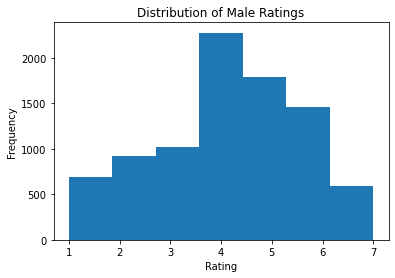

In [95]:
plt.hist(male_ratings.values.flatten(), bins=7, range=(1,7))
plt.title('Distribution of Male Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [96]:
fem_ratings = q3data[q3data['gender'] == 2]
fem_mean = fem_ratings.mean().mean()
fem_mean

4.201542385231965

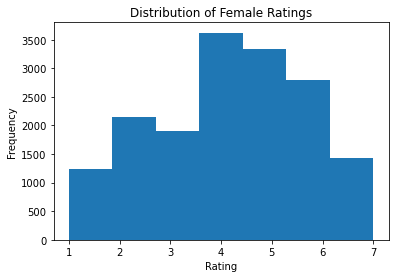

In [97]:
plt.hist(fem_ratings.values.flatten(), bins=7, range=(1,7))
plt.title('Distribution of Female Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [99]:
t, p = stats.ttest_ind(male_ratings.values.flatten(), fem_ratings.values.flatten(), equal_var=False)

print("t-value:", t)
print("p-value:", p)

t-value: -0.9981549864394175
p-value: 0.31821728516389297


In this specific instance, yes. But there is no statistically significant difference between the ratings of men and women.

## Question 4

In [100]:
q4data = data.loc[:, '1':'91'].assign(art_ed=data['art_ed'])
q4data.head()

,1,2,3,4,5,6,7,8,9,10,...,83,84,85,86,87,88,89,90,91,art_ed
0,7,6,2,6,3,3,5,4,6,6,...,2,2,1,2,1,1,5,5,2,0.0
1,6,6,5,6,5,5,4,6,2,5,...,5,3,2,3,6,1,4,2,5,1.0
2,7,6,6,6,5,6,7,6,5,5,...,4,7,6,3,4,4,5,4,4,1.0
3,6,6,5,7,6,5,4,6,6,6,...,5,6,4,2,4,4,4,3,5,1.0
4,7,5,5,5,6,5,5,7,6,7,...,1,4,2,5,4,2,4,6,3,0.0


In [101]:
some_school = q4data[(q4data['art_ed'] >= 1) & (q4data['art_ed'] <= 3)]
some_mean = some_school.mean().mean()
some_mean

4.1642576318223865

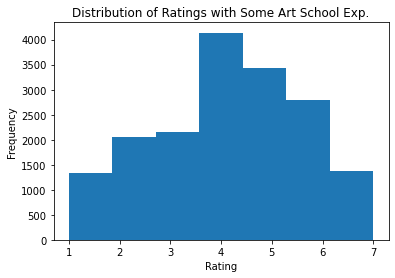

In [102]:
plt.hist(some_school.values.flatten(), bins=7, range=(1,7))
plt.title('Distribution of Ratings with Some Art School Exp.')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [103]:
no_school = q4data[(q4data['art_ed'] == 0)]
no_mean = no_school.mean().mean()
no_mean

4.258979206049149

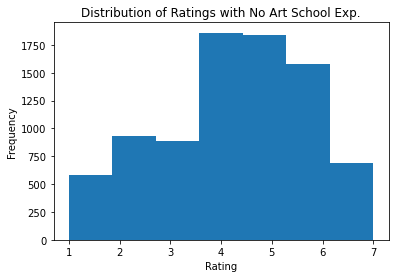

In [104]:
plt.hist(no_school.values.flatten(), bins=7, range=(1,7))
plt.title('Distribution of Ratings with No Art School Exp.')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [106]:
t, p = stats.ttest_ind(some_school.values.flatten(), no_school.values.flatten(), equal_var=False)

print("t-value:", t)
print("p-value:", p)

t-value: -4.172606116758659
p-value: 3.026822469744327e-05


There is no significant difference in the preference ratings of users with some art background (some art education) vs. none

## Question 5

In [107]:
q5data = data.iloc[:,: 182]
q5data.head()

,1,2,3,4,5,6,7,8,9,10,...,energy_82,energy_83,energy_84,energy_85,energy_86,energy_87,energy_88,energy_89,energy_90,energy_91
0,7,6,2,6,3,3,5,4,6,6,...,4,4,3,4,4,4,4,3,6,4
1,6,6,5,6,5,5,4,6,2,5,...,6,5,3,4,4,3,2,3,5,5
2,7,6,6,6,5,6,7,6,5,5,...,4,4,2,4,4,4,4,4,4,4
3,6,6,5,7,6,5,4,6,6,6,...,5,3,5,5,4,4,5,5,5,4
4,7,5,5,5,6,5,5,7,6,7,...,3,1,5,2,4,1,1,4,4,3


In [108]:
q5data.isnull().sum()

1            0
2            0
3            0
4            0
5            0
            ..
energy_87    0
energy_88    0
energy_89    0
energy_90    0
energy_91    0
Length: 182, dtype: int64

In [109]:
art_ratings = q5data.iloc[:,: 91]
energy_ratings = q5data.iloc[:,91: 182]

In [110]:
#regular regression

from sklearn.model_selection import train_test_split
X = energy_ratings
y = art_ratings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= random_seed)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 1.6859516409795383


In [111]:
#Ridge Regression

ridge = Ridge(normalize = True)
alph = 0.1
ridge.set_params(alpha = alph)
ridge.fit(X, y) 
newBetas = ridge.coef_

ridge2 = Ridge(alpha = alph, normalize = True)
ridge2.fit(X_train, y_train)                       
pred2 = ridge2.predict(X_test)                    
print( np.sqrt(mean_squared_error(y_test, pred2)))          

1.5144116436335955


C:\Users\moazz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\moazz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

In [113]:
#Lasso Regression

lasso = Lasso(max_iter = 1000, normalize = True)
lasso.set_params(alpha=alph)
lasso.fit(scale(X_train), y_train)
yetNewBetas = lasso.coef_
print( np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

1.3653219032787285


C:\Users\moazz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\moazz\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Based on the RMSE of my regression models, the energy of the painting doesn't seem to be a great predictor of painting preference ratings. Our best RSME tells us that our model on average is off by about 1.37 units in ratings, which is substantial given the scale is 1-7.

## Question 6

In [114]:
q6data = data.loc[:, '1':'91']
q6data = pd.concat([q6data, data.iloc[:, 91:182]], axis=1)
q6data = pd.concat([q6data, data.iloc[:, 215:221]], axis=1)
q6data

,1,2,3,4,5,6,7,8,9,10,...,energy_88,energy_89,energy_90,energy_91,age,gender,politics,art_ed,sophistication,artist
0,7,6,2,6,3,3,5,4,6,6,...,4,3,6,4,19.0,2.0,3.0,0.0,2.0,2.0
1,6,6,5,6,5,5,4,6,2,5,...,2,3,5,5,20.0,1.0,6.0,1.0,3.0,1.0
2,7,6,6,6,5,6,7,6,5,5,...,4,4,4,4,18.0,2.0,2.0,1.0,1.0,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5,5,5,4,21.0,2.0,5.0,1.0,3.0,0.0
4,7,5,5,5,6,5,5,7,6,7,...,1,4,4,3,22.0,1.0,3.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,6,4,5,4,20.0,1.0,3.0,1.0,1.0,2.0
296,4,5,6,6,4,3,4,6,4,6,...,4,4,4,4,21.0,1.0,2.0,2.0,2.0,1.0
297,7,6,5,2,5,6,6,5,5,7,...,5,1,6,2,19.0,1.0,2.0,2.0,0.0,2.0
298,7,4,4,6,4,5,5,2,7,2,...,6,6,4,3,19.0,2.0,2.0,2.0,2.0,1.0


In [115]:
q6data.isnull().sum()

1                  0
2                  0
3                  0
4                  0
5                  0
                  ..
gender            20
politics          20
art_ed            20
sophistication    20
artist            20
Length: 188, dtype: int64

In [116]:
q6data = q6data.dropna()

In [117]:
q6data.isnull().sum()

1                 0
2                 0
3                 0
4                 0
5                 0
                 ..
gender            0
politics          0
art_ed            0
sophistication    0
artist            0
Length: 188, dtype: int64

In [118]:
art_ratings = q6data.iloc[:,: 91]
energy__demographic_ratings = q6data.iloc[:,91: 188]

In [119]:
#regular regression

from sklearn.model_selection import train_test_split
X = energy__demographic_ratings
y = art_ratings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= random_seed)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 2.114596493450012


In [120]:
#Ridge Regression

ridge = Ridge(normalize = True)
alph = 0.1
ridge.set_params(alpha = alph)
ridge.fit(X, y) 
newBetas = ridge.coef_

ridge2 = Ridge(alpha = alph, normalize = True)
ridge2.fit(X_train, y_train)                       
pred2 = ridge2.predict(X_test)                    
print( np.sqrt(mean_squared_error(y_test, pred2)))

1.834195718594914


C:\Users\moazz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\moazz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

In [121]:
#Lasso Regression

lasso = Lasso(max_iter = 1000, normalize = True)
lasso.set_params(alpha=alph)
lasso.fit(scale(X_train), y_train)
yetNewBetas = lasso.coef_
print( np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

1.5563433454065545


C:\Users\moazz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\moazz\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Based on the RMSE of my regression models, energy ratings and demographic ratings don't seem to be great predictors of painting preference ratings. Our best RSME tells us that our model on average is off by about 1.56 units in ratings, which is substantial given the scale is 1-7. This model does worse than our previous models most likely due to the increased amount of factors introduced in this model. These variables mau be correlated with each other and thus not provide the best estimates.

## Question 7

In [122]:
q7data = data.iloc[:,: 182]

In [123]:
art_mean = q7data.iloc[:,: 91].mean()
energy_mean = q7data.iloc[:,91: 182].mean()

In [124]:
art_df = pd.DataFrame({'Avg. Art Rating': art_mean}).reset_index(drop=True)
energy_df = pd.DataFrame({'Avg. Energy Rating': energy_mean}).reset_index(drop=True)
means_df = pd.concat([art_df, energy_df], axis=1)
means_df

,Avg. Art Rating,Avg. Energy Rating
0,5.276667,3.866667
1,5.630000,4.136667
2,4.406667,3.350000
3,5.843333,3.386667
4,4.190000,4.080000
...,...,...
86,3.476667,4.086667
87,3.353333,4.286667
88,4.913333,3.603333
89,3.833333,4.246667


In [125]:
means_df['Avg. Art Rating'] = skp.MinMaxScaler().fit_transform(means_df['Avg. Art Rating'].values.reshape(-1,1))
means_df['Avg. Energy Rating'] = skp.MinMaxScaler().fit_transform(means_df['Avg. Energy Rating'].values.reshape(-1,1))
means_df

,Avg. Art Rating,Avg. Energy Rating
0,0.837165,0.459821
1,0.938697,0.580357
2,0.587165,0.229167
3,1.000000,0.245536
4,0.524904,0.555060
...,...,...
86,0.319923,0.558036
87,0.284483,0.647321
88,0.732759,0.342262
89,0.422414,0.629464


In [126]:
errors=[]
for n in range(1,11):
    my_kmeans = KMeans(n, init='k-means++', random_state = random_seed)
    my_kmeans.fit(means_df)
    errors.append(my_kmeans.inertia_)

C:\Users\moazz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


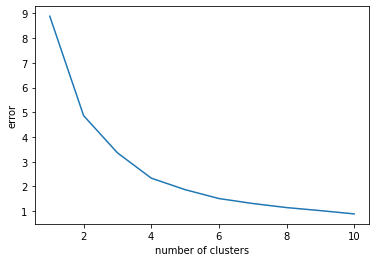

In [127]:
plt.plot(range(1,11), errors)
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [128]:
my_kmeans=KMeans(3,init='k-means++',random_state = random_seed)
my_kmeans.fit(means_df)
means_df['cluster']=my_kmeans.labels_
means_df

,Avg. Art Rating,Avg. Energy Rating,cluster
0,0.837165,0.459821,1
1,0.938697,0.580357,1
2,0.587165,0.229167,1
3,1.000000,0.245536,1
4,0.524904,0.555060,0
...,...,...,...
86,0.319923,0.558036,2
87,0.284483,0.647321,2
88,0.732759,0.342262,1
89,0.422414,0.629464,0


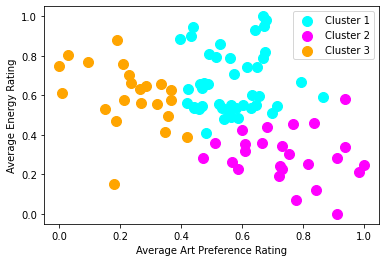

In [129]:
colors = ['cyan', 'magenta', 'orange']
for i in range(0,3):
    plt.scatter(means_df.loc[means_df['cluster'] == i, 'Avg. Art Rating'], means_df.loc[means_df['cluster'] == i, 'Avg. Energy Rating'], s=100, c=colors[i], label=f'Cluster {i+1}')
plt.xlabel('Average Art Preference Rating')
plt.ylabel('Average Energy Rating')
plt.legend()
plt.show()

3 clusters. Cluster 1 is modern. Cluster 2 is classical. Cluster 3 is nonhuman.

## Question 8

In [130]:
q8data = data.iloc[:, list(range(0, 91)) + list(range(205, 215))]
q8data

,1,2,3,4,5,6,7,8,9,10,...,self_1,self_2,self_3,self_4,self_5,self_6,self_7,self_8,self_9,self_10
0,7,6,2,6,3,3,5,4,6,6,...,5.0,2.0,5.0,4.0,5.0,2.0,5.0,2.0,3.0,4.0
1,6,6,5,6,5,5,4,6,2,5,...,3.0,2.0,4.0,4.0,2.0,2.0,4.0,3.0,2.0,4.0
2,7,6,6,6,5,6,7,6,5,5,...,3.0,1.0,4.0,4.0,3.0,2.0,4.0,1.0,2.0,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5.0,3.0,5.0,4.0,5.0,2.0,5.0,3.0,5.0,4.0
4,7,5,5,5,6,5,5,7,6,7,...,3.0,3.0,4.0,3.0,5.0,2.0,3.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,5.0,5.0,4.0,4.0,3.0,3.0,1.0,3.0,3.0,4.0
296,4,5,6,6,4,3,4,6,4,6,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
297,7,6,5,2,5,6,6,5,5,7,...,2.0,1.0,4.0,4.0,4.0,2.0,4.0,1.0,2.0,2.0
298,7,4,4,6,4,5,5,2,7,2,...,2.0,1.0,4.0,4.0,2.0,2.0,2.0,1.0,3.0,1.0


In [131]:
q8data.isnull().sum()

1          0
2          0
3          0
4          0
5          0
          ..
self_6     5
self_7     2
self_8     4
self_9     2
self_10    3
Length: 101, dtype: int64

In [132]:
q8data.dropna(how='any', inplace=True)
q8data.isnull().sum()

C:\Users\moazz\AppData\Local\Temp\ipykernel_30196\3488866585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q8data.dropna(how='any', inplace=True)


1          0
2          0
3          0
4          0
5          0
          ..
self_6     0
self_7     0
self_8     0
self_9     0
self_10    0
Length: 101, dtype: int64

In [145]:
art_ratings = q8data.iloc[:,: 91]
self_df = q8data.iloc[:,91:102] 
norm_self_df = stats.zscore(self_df)

,self_1,self_2,self_3,self_4,self_5,self_6,self_7,self_8,self_9,self_10
0,1.436482,-0.400527,1.049120,0.268246,1.301803,-0.221463,1.080325,-0.257629,-0.301309,0.489825
1,-0.275326,-0.400527,-0.211587,0.268246,-1.153025,-0.221463,0.032959,0.630104,-1.099222,0.489825
2,-0.275326,-1.174518,-0.211587,0.268246,-0.334749,-0.221463,0.032959,-1.145361,-1.099222,-1.218589
3,1.436482,0.373464,1.049120,0.268246,1.301803,-0.221463,1.080325,0.630104,1.294515,0.489825
4,-0.275326,0.373464,-0.211587,-0.754665,1.301803,-0.221463,-1.014407,1.517836,-0.301309,-0.364382
...,...,...,...,...,...,...,...,...,...,...
295,1.436482,1.921447,-0.211587,0.268246,-0.334749,0.670629,-3.109139,0.630104,-0.301309,0.489825
296,-0.275326,0.373464,-1.472295,-0.754665,-0.334749,0.670629,-1.014407,0.630104,-0.301309,-0.364382
297,-1.131230,-1.174518,-0.211587,0.268246,0.483527,-0.221463,0.032959,-1.145361,-1.099222,-1.218589
298,-1.131230,-1.174518,-0.211587,0.268246,-1.153025,-0.221463,-2.061773,-1.145361,-0.301309,-2.072796


In [134]:
pca = PCA(n_components = 1)
self_pca = pca.fit_transform(norm_self_df)
self_pca_df = pd.DataFrame(self_pca, columns=['PCA Component 1'])

In [135]:
X = self_pca_df
y = art_ratings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_seed)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 1.4819254292467448


## Question 9

In [141]:
q9data = data.iloc[:, np.r_[0:91, 182:194]]
q9data

,1,2,3,4,5,6,7,8,9,10,...,dark_3,dark_4,dark_5,dark_6,dark_7,dark_8,dark_9,dark_10,dark_11,dark_12
0,7,6,2,6,3,3,5,4,6,6,...,4.0,2.0,1.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0
1,6,6,5,6,5,5,4,6,2,5,...,2.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0
2,7,6,6,6,5,6,7,6,5,5,...,4.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,4.0,2.0
3,6,6,5,7,6,5,4,6,6,6,...,4.0,2.0,2.0,1.0,4.0,1.0,4.0,4.0,3.0,2.0
4,7,5,5,5,6,5,5,7,6,7,...,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,1.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0
296,4,5,6,6,4,3,4,6,4,6,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
297,7,6,5,2,5,6,6,5,5,7,...,4.0,4.0,2.0,4.0,5.0,5.0,4.0,5.0,3.0,4.0
298,7,4,4,6,4,5,5,2,7,2,...,4.0,2.0,1.0,1.0,4.0,3.0,4.0,4.0,2.0,3.0


In [149]:
q9data.isnull().sum()

1          0
2          0
3          0
4          0
5          0
          ..
dark_8     2
dark_9     5
dark_10    2
dark_11    4
dark_12    6
Length: 103, dtype: int64

In [151]:
q9data.dropna(how='any', inplace=True)
q9data.isnull().sum()

C:\Users\moazz\AppData\Local\Temp\ipykernel_30196\1297645939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q9data.dropna(how='any', inplace=True)


1          0
2          0
3          0
4          0
5          0
          ..
dark_8     0
dark_9     0
dark_10    0
dark_11    0
dark_12    0
Length: 103, dtype: int64

In [164]:
art_ratings = q9data.iloc[:,: 91]
dark_df = q9data.iloc[:, 91:]
norm_dark_df = stats.zscore(dark_df)

In [165]:
pca = PCA(n_components=3)
dark_pca = pca.fit_transform(norm_dark_df)
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=dark_df.columns)
loadings_df

,PC1,PC2,PC3
dark_1,0.392993,0.047659,0.238183
dark_2,0.306500,-0.022547,-0.028716
dark_3,0.234123,-0.204888,0.053256
dark_4,0.390195,0.179290,0.311828
dark_5,0.272703,0.415967,-0.105307
dark_6,0.286800,0.372865,0.040553
dark_7,0.283650,0.243724,-0.446176
dark_8,0.202756,0.050458,-0.608868
dark_9,0.220680,-0.481417,-0.272306
dark_10,0.235190,-0.466951,-0.084911


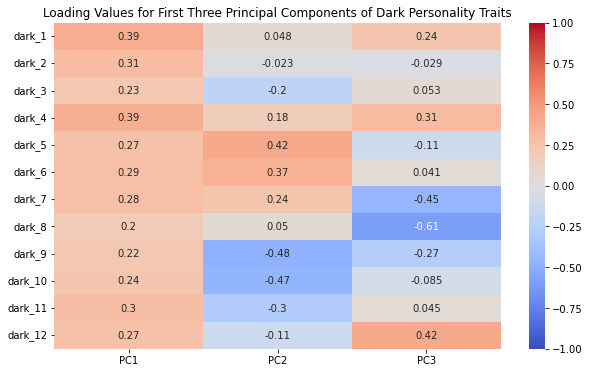

In [213]:
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('Loading Values for First Three Principal Components of Dark Personality Traits')
plt.show()

In [206]:
X = dark_pca
y = art_ratings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_seed)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 1.5112183151951406


In [168]:
#Lasso Regression

lasso = Lasso(max_iter = 1000, normalize = True)
lasso.set_params(alpha=alph)
lasso.fit(scale(X_train), y_train)
yetNewBetas = lasso.coef_
print( np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

1.524941119875827


C:\Users\moazz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


## Question 10

In [195]:
q10data = data.copy()

In [196]:
q10data.isnull().sum()

1                  0
2                  0
3                  0
4                  0
5                  0
                  ..
gender            20
politics          20
art_ed            20
sophistication    20
artist            20
Length: 221, dtype: int64

In [197]:
q10data.dropna(how='any', inplace=True)
q10data.isnull().sum()

1                 0
2                 0
3                 0
4                 0
5                 0
                 ..
gender            0
politics          0
art_ed            0
sophistication    0
artist            0
Length: 221, dtype: int64

In [198]:
q10data

,1,2,3,4,5,6,7,8,9,10,...,self_7,self_8,self_9,self_10,age,gender,politics,art_ed,sophistication,artist
0,7,6,2,6,3,3,5,4,6,6,...,5.0,2.0,3.0,4.0,19.0,2.0,3.0,0.0,2.0,2.0
1,6,6,5,6,5,5,4,6,2,5,...,4.0,3.0,2.0,4.0,20.0,1.0,6.0,1.0,3.0,1.0
2,7,6,6,6,5,6,7,6,5,5,...,4.0,1.0,2.0,2.0,18.0,2.0,2.0,1.0,1.0,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5.0,3.0,5.0,4.0,21.0,2.0,5.0,1.0,3.0,0.0
4,7,5,5,5,6,5,5,7,6,7,...,3.0,4.0,3.0,3.0,22.0,1.0,3.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,1.0,3.0,3.0,4.0,20.0,1.0,3.0,1.0,1.0,2.0
296,4,5,6,6,4,3,4,6,4,6,...,3.0,3.0,3.0,3.0,21.0,1.0,2.0,2.0,2.0,1.0
297,7,6,5,2,5,6,6,5,5,7,...,4.0,1.0,2.0,2.0,19.0,1.0,2.0,2.0,0.0,2.0
298,7,4,4,6,4,5,5,2,7,2,...,2.0,1.0,3.0,1.0,19.0,2.0,2.0,2.0,2.0,1.0


In [199]:
def map_politics(val):
    if val in [1, 2]:
        return 0  #left
    else:
        return 1  #non-left
    
q10data['politics'] = q10data['politics'].apply(map_politics)

In [200]:
q10data = q10data.assign(**{'politics': q10data.pop('politics')})
q10data

,1,2,3,4,5,6,7,8,9,10,...,self_7,self_8,self_9,self_10,age,gender,art_ed,sophistication,artist,politics
0,7,6,2,6,3,3,5,4,6,6,...,5.0,2.0,3.0,4.0,19.0,2.0,0.0,2.0,2.0,1
1,6,6,5,6,5,5,4,6,2,5,...,4.0,3.0,2.0,4.0,20.0,1.0,1.0,3.0,1.0,1
2,7,6,6,6,5,6,7,6,5,5,...,4.0,1.0,2.0,2.0,18.0,2.0,1.0,1.0,2.0,0
3,6,6,5,7,6,5,4,6,6,6,...,5.0,3.0,5.0,4.0,21.0,2.0,1.0,3.0,0.0,1
4,7,5,5,5,6,5,5,7,6,7,...,3.0,4.0,3.0,3.0,22.0,1.0,0.0,3.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,1.0,3.0,3.0,4.0,20.0,1.0,1.0,1.0,2.0,1
296,4,5,6,6,4,3,4,6,4,6,...,3.0,3.0,3.0,3.0,21.0,1.0,2.0,2.0,1.0,0
297,7,6,5,2,5,6,6,5,5,7,...,4.0,1.0,2.0,2.0,19.0,1.0,2.0,0.0,2.0,0
298,7,4,4,6,4,5,5,2,7,2,...,2.0,1.0,3.0,1.0,19.0,2.0,2.0,2.0,1.0,0


In [202]:
allotherData = q10data.iloc[:, :-1]
political = q10data['politics']

In [204]:
X = allotherData
y = political

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)
rf = RandomForestClassifier(n_estimators=100, random_state=random_seed).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.93      0.68        41
           1       0.77      0.24      0.36        42

    accuracy                           0.58        83
   macro avg       0.66      0.58      0.52        83
weighted avg       0.66      0.58      0.52        83

